In [1]:
import cfdmod.hfpi_mock as hfpi
import pathlib

### Report directory
base_base = pathlib.Path("/mnt/disk01/prd-eng/portfolio-eng/simulation_files/petra_nova_fluidmechanics/comparison/dynamic_analysis")
subproject_path = base_base / "subproj_main"
structure_path = base_base / "struct_original"
case_path = subproject_path / "out"
data_path = subproject_path / "forces/"

base_folder = pathlib.Path("/mnt/disk01/prd-eng/cases/petra_nova_fluidmechanics/engmod_case")
experimental_data_path = base_folder / "../comparison/force_by_floor/exp_csv/"

modes_csv = structure_path / "modes.csv"
n_modes = 12
floors_csv = structure_path / "nodes.csv"
phi_csvs = [structure_path / f"phi_{i}.csv" for i in range(1, n_modes+1)]

case_use = "000"



In [2]:
struct_data = hfpi.HFPIStructuralData.build(
    modes_csv=modes_csv,
    floors_csv=floors_csv,
    phi_floors_csvs=phi_csvs,
)

struct_data.normalize_all_mode_shapes()

In [3]:
struct_data.df_floors

,Z,XR,YR,M,I,R
0,-5.76,4.4477,6.0311,1.410972e+06,5.498984e+08,19.741587
1,-2.88,6.0944,8.2593,1.459644e+06,5.692838e+08,19.748808
2,0.90,7.1961,9.6126,1.846879e+06,7.131593e+08,19.650520
3,6.66,6.9063,7.4595,1.978057e+06,7.730039e+08,19.768399
4,9.54,6.5190,6.1413,1.709639e+06,6.756887e+08,19.880215
...,...,...,...,...,...,...
71,229.68,0.7274,0.7236,2.631326e+05,1.690119e+07,8.014406
72,232.92,0.7053,0.7512,3.031569e+05,1.977300e+07,8.076117
73,238.68,0.6542,0.8616,2.889074e+05,1.797592e+07,7.887987
74,242.10,0.5327,0.9155,4.336076e+05,1.000399e+07,4.803282


In [4]:
struct_data.df_modes

,mode,period,frequency,wp
0,1,5.404,0.185048,1.162692
1,2,4.497,0.222370,1.397195
2,3,2.248,0.444840,2.795011
3,4,1.537,0.650618,4.087954
4,5,1.378,0.725689,4.559641
5,6,0.862,1.160093,7.289078
6,7,0.812,1.231527,7.737913
7,8,0.659,1.517451,9.534424
8,9,0.563,1.776199,11.160187
9,10,0.518,1.930502,12.129701


In [5]:
struct_data.df_phi_floors[0]

,DX,DY,RZ
0,-5.985839e-09,1.153542e-07,-2.665220e-11
1,-3.134956e-08,3.399754e-07,-1.014549e-10
2,-4.595907e-08,7.626365e-07,-2.029098e-10
3,3.237426e-07,1.839580e-06,-4.058196e-10
4,6.203967e-07,2.527850e-06,-5.072745e-10
...,...,...,...
71,9.551847e-05,2.584168e-04,-1.288477e-08
72,9.709000e-05,2.629767e-04,-1.288477e-08
73,1.004680e-04,2.717976e-04,-1.298623e-08
74,1.034792e-04,2.731685e-04,-1.288477e-08


In [6]:
case_data = hfpi.HFPICaseData(
    U_H=30.6,
    height=250.42,
    base=90.6,
    xi=0.02,
)

In [7]:

cf_x_h5 = data_path / f"FX_{case_use}.h5"
cf_y_h5 = data_path / f"FY_{case_use}.h5"
cm_z_h5 = data_path / f"MZ_{case_use}.h5"

forces_data = hfpi.HFPIForcesData.build(cf_x_h5, cf_y_h5, cm_z_h5)
forces_data = forces_data.get_scaled_forces(case_data)


In [8]:
solver_hfpi = hfpi.HFPISolver(
    structural_data=struct_data,
    case_data=case_data,
    forces=forces_data,
)

In [9]:
forces_data.cf_x.shape

(11251, 75)

/tmp/ipykernel_64897/3083506777.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


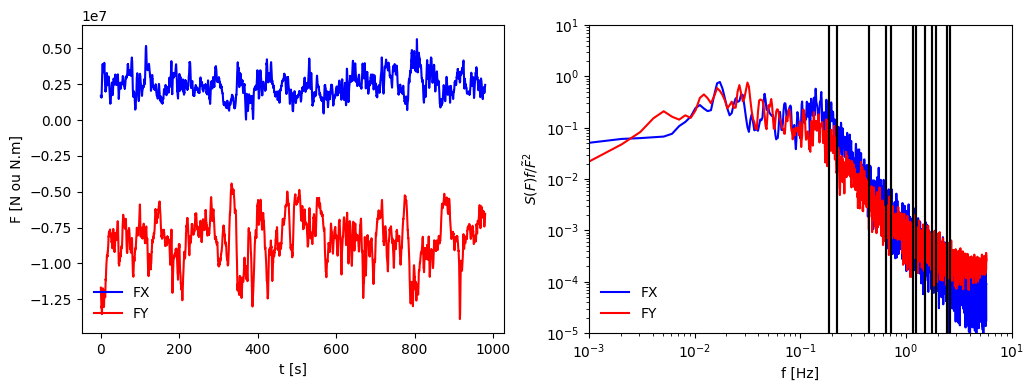

In [10]:
fig, axs = hfpi.plot_force_series(forces_data, struct_data, sigma=1, plot_mz=False)

axs[1].set_xlim([1e-3, 1e1])

fig.show()

In [11]:
real_displacement = solver_hfpi.get_real_displacement()
real_displacement

ValueError: Forces were already scaled. Unable to scale again